In [1]:
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage
from langgraph.graph import add_messages, StateGraph, END
from langchain_groq import ChatGroq

In [2]:
class State(TypedDict): 
    messages: Annotated[list, add_messages]

In [3]:
llm = ChatGroq(model="llama-3.1-8b-instant")

In [ ]:
GENERATE_POST = "generate_post"
GET_REVIEW_DECISION = "get_review_decision"
POST = "post"
COLLECT_FEEDBACK = "collect_feedback"

In [6]:
def generate_post(state: State): 
    return {
        "messages": [llm.invoke(state["messages"])]
    }

def get_review_decision(state: State):  
    post_content = state["messages"][-1].content 
    
    print("\n📢 Current LinkedIn Post:\n")
    print(post_content)
    print("\n")

    decision = input("Post to LinkedIn? (yes/no): ")

    if decision.lower() == "yes":
        return POST
    else:
        return COLLECT_FEEDBACK


def post(state: State):  
    final_post = state["messages"][-1].content  
    print("\n📢 Final LinkedIn Post:\n")
    print(final_post)
    print("\n✅ Post has been approved and is now live on LinkedIn!")

def collect_feedback(state: State):  
    feedback = input("How can I improve this post?")
    return {
        "messages": [HumanMessage(content=feedback)]
    }

In [ ]:
graph = StateGraph(State)

graph.add_node(GENERATE_POST, generate_post)
graph.add_node(GET_REVIEW_DECISION, get_review_decision)
graph.add_node(COLLECT_FEEDBACK, collect_feedback)
graph.add_node(POST, post)


graph.set_entry_point(GENERATE_POST)
graph.add_conditional_edges(
    GENERATE_POST,get_review_decision)
graph.add_edge(POST, END)
graph.add_edge(COLLECT_FEEDBACK, GENERATE_POST)

app = graph.compile()

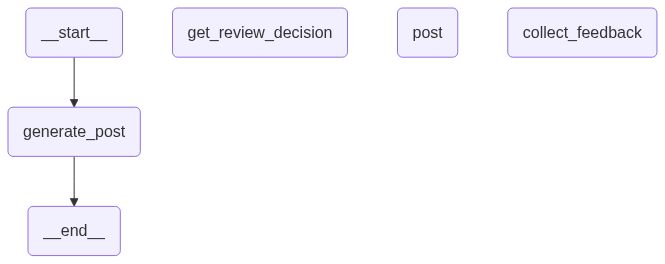

In [11]:
app

In [10]:
response = app.invoke({
    "messages": [HumanMessage(content="Write me a LinkedIn post on AI Agents taking over content creation")]
})

print(response)


📢 Current LinkedIn Post:

**The Future of Content Creation: AI Agents Taking Center Stage**

As we continue to navigate the ever-evolving landscape of digital media, a fascinating trend is emerging: AI agents are increasingly taking over content creation tasks.

From generating engaging social media posts to crafting compelling articles, AI-powered tools are revolutionizing the way we produce and consume content. These intelligent agents are capable of analyzing vast amounts of data, learning from patterns, and producing high-quality content that resonates with audiences.

**What does this mean for creators?**

While AI agents are certainly changing the game, they're not necessarily replacing human creatives. Instead, they're augmenting our abilities, freeing us to focus on higher-level tasks that require creativity, empathy, and nuance.

**Benefits of AI-powered content creation:**

1. **Increased efficiency**: AI can produce content at scale, saving time and resources for human crea